<a href="https://colab.research.google.com/github/swethag04/ml-projects/blob/main/kmeans/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

import warnings

In [2]:
warnings.filterwarnings("ignore")

**Dataset:** The dataset used in this analysis is from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

**Objective:** The objective is to use clustering to identify groups of similar customers.

In [3]:
df = pd.read_csv('sample_data/marketing_campaign.csv', sep = '\t')

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
# missing data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

`Income` column has some missing data. This will cause issues for PCA and clustering algorthms. Dropping the missing data.

In [9]:
df = df.dropna()

In [10]:
#Identifying the list of non numeric columns
object_cols = list(df.select_dtypes(include='object').columns)
print(object_cols)

['Education', 'Marital_Status', 'Dt_Customer']


In [11]:
# Convert `Dt_Customer` to date time
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [12]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [13]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [14]:
# Converting categorical columns to numeric
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,15,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,634,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,367,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,645,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,504,94,173,...,5,0,0,0,0,0,0,3,11,0


In [15]:
df['Z_CostContact'].value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [16]:
df['Z_Revenue'].value_counts()

11    2216
Name: Z_Revenue, dtype: int64

The columns `Z_CostContact` and `Z_Revenue` have one unique value.
The `ID` column is basically an index.
These columns do not add any information and hence dropping them.


In [17]:
df = df.drop(['Z_CostContact', 'Z_Revenue', 'ID'], axis=1)
df.shape

(2216, 26)

In [18]:
# Adding a new column : Total anount
df['total_spent'] = df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

In [19]:
# Scaling the data to center the mean
df_scaled = (df - df.mean())/df.std()
df_scaled.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent
0,-0.986220,-0.350448,0.254161,0.234010,-0.822854,-0.928763,-1.642999,0.310462,0.978005,1.549080,...,-0.554018,0.693076,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,2.377415,1.675110
1,-1.236522,-0.350448,0.254161,-0.234507,1.039704,0.908861,1.600134,-0.380424,-0.871827,-0.637184,...,-1.169254,-0.131545,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,-0.420435,-0.962141
2,-0.318750,-0.350448,1.182036,0.769304,-0.822854,-0.928763,0.201238,-0.794955,0.358430,0.569031,...,1.291690,-0.543855,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,-0.420435,0.280187
3,1.266492,-0.350448,1.182036,-1.017009,1.039704,-0.928763,1.657766,-0.794955,-0.871827,-0.561796,...,-0.554018,0.280765,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,-0.420435,-0.919016
4,1.016190,1.428688,-0.673714,0.240167,1.039704,-0.928763,0.919024,1.554056,-0.391582,0.418254,...,0.061218,-0.131545,-0.281709,-0.282641,-0.280776,-0.261602,-0.117122,-0.09779,-0.420435,-0.306975


**Dimensionality reduction using PCA**

In [20]:
# PCA to reduce the number of features
# Choosing 3 Principal components so it is easy to visualize
pca = PCA(n_components=3, random_state=42)
components = pca.fit_transform(df_scaled)
components.shape

(2216, 3)

**K-Means for clustering**

Elbow Method to determine the number of clusters to be formed:


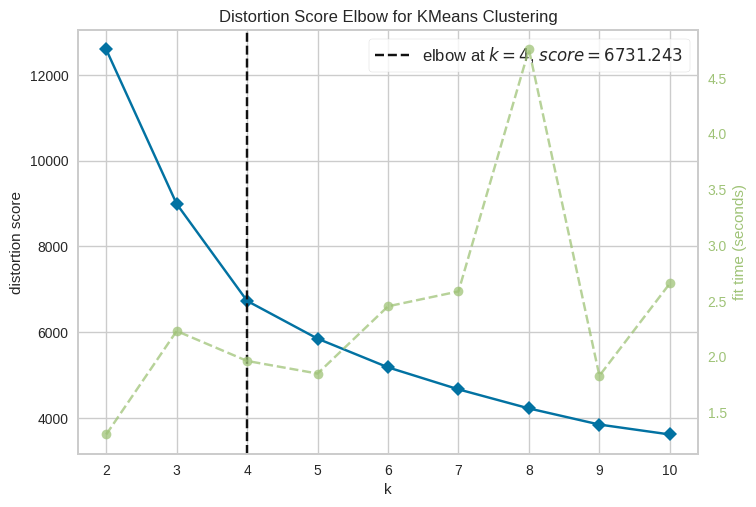

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
#Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(components)
Elbow_M.show()

The Elbow plot indicates that the optimum number of clusters for this data is 4

In [22]:
# Kmeans
kmeans = KMeans(random_state=42, n_clusters=4).fit(components)
df['cluster'] = kmeans.labels_
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spent,cluster
0,1957,2,4,58138.0,0,0,15,58,635,88,...,7,0,0,0,0,0,0,1,1617,2
1,1954,2,4,46344.0,1,1,634,38,11,1,...,5,0,0,0,0,0,0,0,27,0
2,1965,2,5,71613.0,0,0,367,26,426,49,...,4,0,0,0,0,0,0,0,776,2
3,1984,2,5,26646.0,1,0,645,26,11,4,...,6,0,0,0,0,0,0,0,53,0
4,1981,4,3,58293.0,1,0,504,94,173,43,...,5,0,0,0,0,0,0,0,422,0


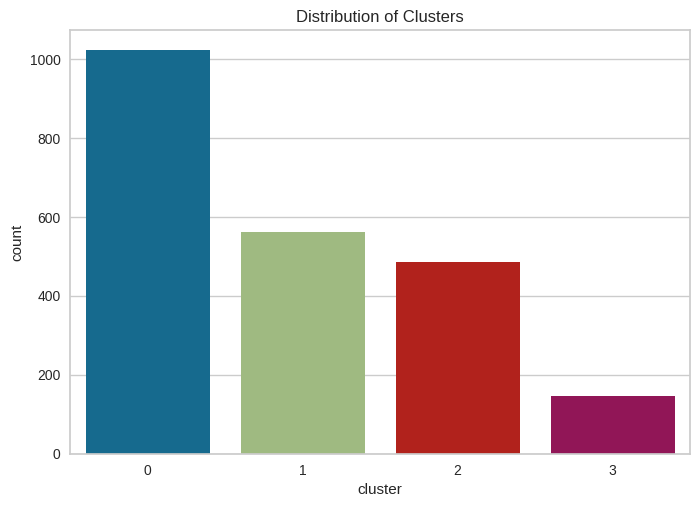

In [23]:
pl = sns.countplot(x=df['cluster'])
pl.set_title("Distribution of Clusters")
plt.show()

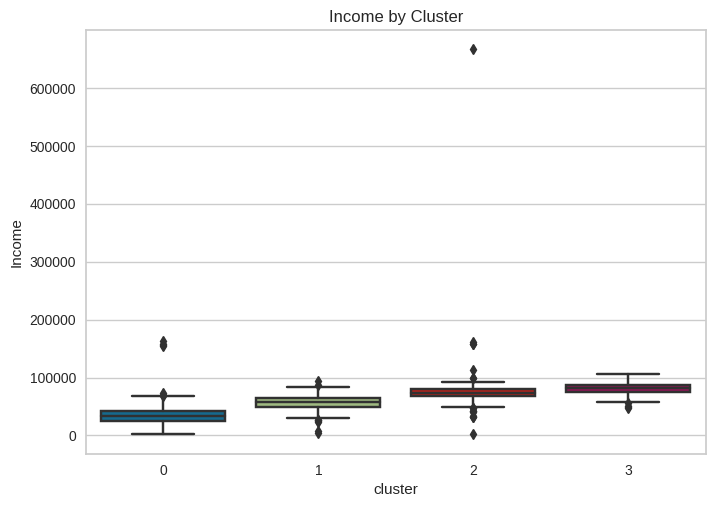

In [24]:
pl = sns.boxplot(x=df['cluster'], y=df['Income'])
pl.set_title("Income by Cluster")
plt.show()

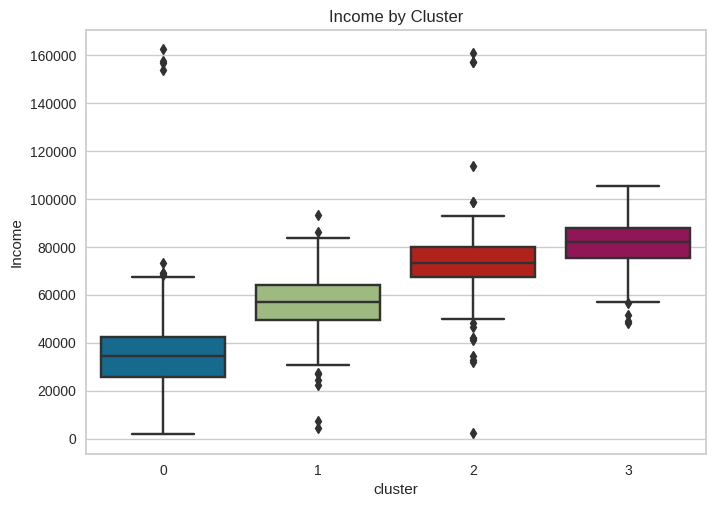

In [25]:
# Dropping the outlier in income to visualize the data better
df = df[(df["Income"]<600000)]
pl = sns.boxplot(x=df['cluster'], y=df['Income'])
pl.set_title("Income by Cluster")
plt.show()

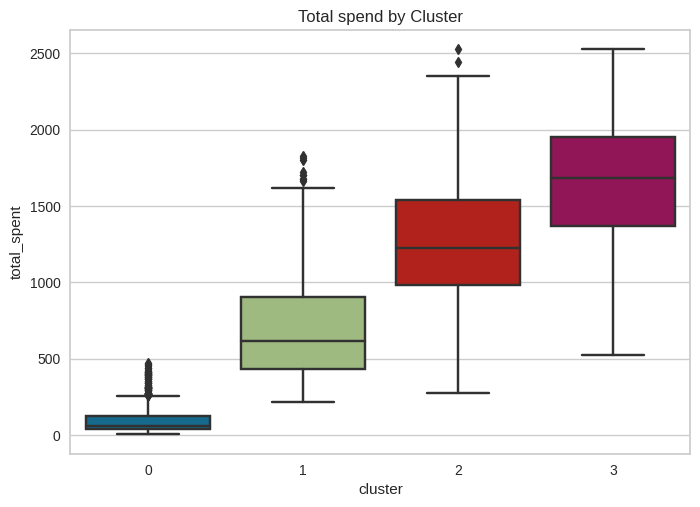

In [26]:
pl = sns.boxplot(x=df['cluster'], y=df['total_spent'])
pl.set_title("Total spend by Cluster")
plt.show()

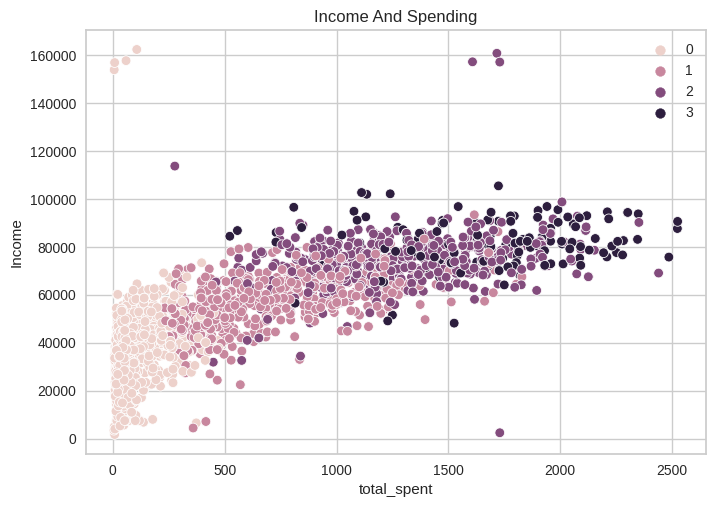

In [27]:
pl = sns.scatterplot(data = df,x=df['total_spent'], y=df['Income'],hue=df['cluster'])
pl.set_title("Income And Spending")
plt.legend()
plt.show()


*   Cluster 0: Low income and low spend
*   Cluster 1: Medium income and medium spend
* Cluster 2: High income and medium spend
* Cluster 3: High income and high spend

